# Analyse results from simple load test

Make some basic sanity plots from the results produced by running `python scripts/load-test.py fboylu/binder --n-launches 20 --filepath=00_DevelopModel.ipynb`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

import json

In [3]:
def load_results(fname, index_offset=0):
    with open(fname) as f:
        data = json.load(f)
        records = data['results']
        gun_time = data['gun_time']
        
    df = pd.DataFrame.from_records(records)
    df['idx'] += index_offset
    df = df.set_index('idx')
    df['total'] = df['end'] - df['start']
    df['launch_delay'] = df['start'] - gun_time
    
    for v in ('ready', 'start', 'notebook', 'kernel', 'end', 'widgets'):
        df[v] = df[v] - gun_time
    
    return df

In [4]:
df1 = load_results('../fboylu-binder-1.json')
df2 = load_results('../fboylu-binder-2.json', index_offset=100)

In [5]:
df1.head()

,end,kernel,notebook,ready,start,status,total_bytes,widgets,total,launch_delay
idx,,,,,,,,,,
23,9.279899,7.643802,7.407082,6.548136,0.021805,success,2449769,9.279895,9.258094,0.021805
54,10.664213,9.749083,9.505755,8.737244,0.135465,success,2449769,10.664210,10.528748,0.135465
15,13.185988,11.545607,11.306930,10.529509,0.232482,success,2449769,13.185984,12.953506,0.232482
3,15.874406,14.945136,14.707718,13.951589,0.212674,success,2449769,15.874402,15.661732,0.212674
19,17.006349,12.558490,12.323344,11.059028,0.131759,success,2449769,17.006345,16.874590,0.131759


In [6]:
df2.head()

,end,kernel,notebook,ready,start,status,total_bytes,widgets,total,launch_delay
idx,,,,,,,,,,
146,28.130328,27.217426,26.980112,26.239460,0.279890,success,2449793,28.130325,27.850438,0.279890
152,37.454922,35.819768,35.581183,34.813790,0.595662,success,2449793,37.454918,36.859260,0.595662
170,42.960398,42.019276,41.786772,41.045297,0.998871,success,2449793,42.960395,41.961527,0.998871
137,48.698492,45.278426,45.073511,44.279275,1.053715,success,2449793,48.698487,47.644777,1.053715
154,55.278682,53.618322,53.381026,52.586807,1.149169,success,2449793,55.278679,54.129513,1.149169


In [7]:
df = pd.concat([df1, df2])

In [8]:
# time for successful launches
df_success = df[df.status == 'success']

In [9]:
df_success['total'].describe()

count    198.000000
mean     181.989311
std      155.828095
min        9.258094
25%      100.156225
50%      138.072722
75%      178.971277
max      572.825401
Name: total, dtype: float64

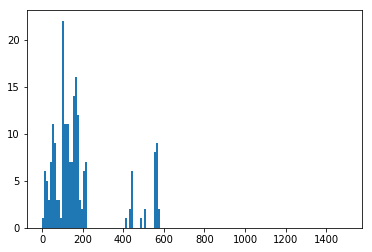

In [10]:
# launch duration, time from making first request
# to the very end of fetching the widgets JS code
plt.hist(df_success.total, range=(0, 1500), bins=150);

In [11]:
from collections import Counter

In [12]:
# how many failures?
Counter(df['status'])

Counter({'success': 198})

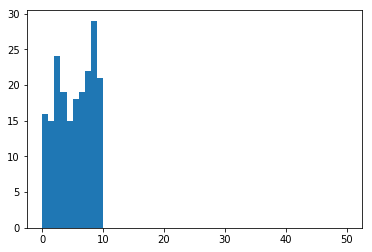

In [13]:
# launch delays/spread, should be between 0 and 10s
plt.hist(df['launch_delay'], bins=50, range=(0,50));

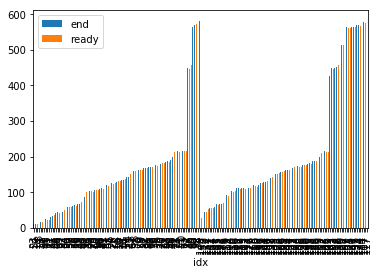

In [18]:
df[['end', 'ready']].plot(kind='bar')

In [15]:
import numpy as np

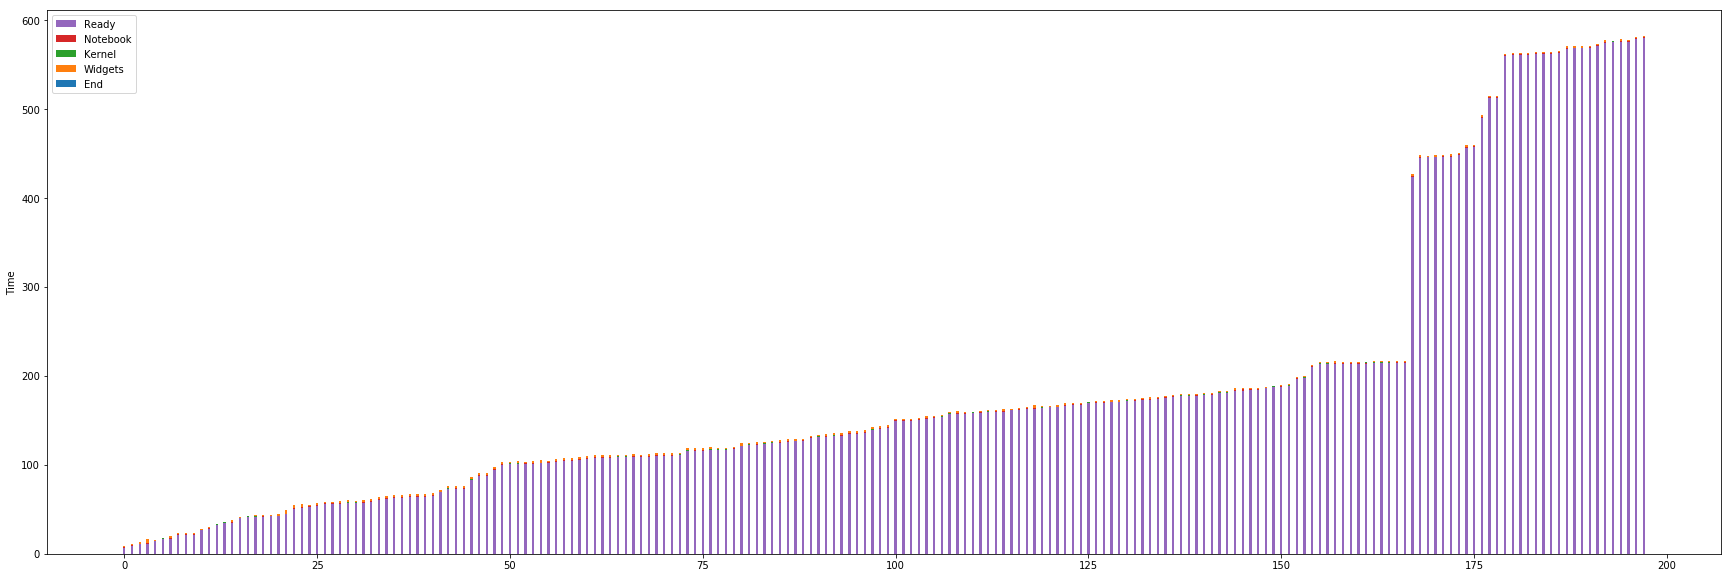

In [35]:
width = 0.3

n_bars = 150

#data = df[np.random.randint(df.idxmin, df.idxmax, size=10)]
data = df.sort_values(by='ready').reset_index()


fig, ax = plt.subplots(1,1, figsize=(30, 10))

p5 = ax.bar(data.index, data['end'], width)
p4 = ax.bar(data.index, data['widgets'], width)
p3 = ax.bar(data.index, data['kernel'], width)
p2 = ax.bar(data.index, data['notebook'], width)
p1 = ax.bar(data.index, data['ready'], width)


plt.ylabel('Time')
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]),
           ('Ready', 'Notebook', 'Kernel', 'Widgets', 'End'))